In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
pd.options.display.max_rows = 999

In [2]:
life_transform=pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions",life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


COUNTRY  STATUS    YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0  Afghanistan       1  2015.0         0.294686         0.802268   
1  Afghanistan       1  2014.0         0.187396         0.813152   
2  Afghanistan       1  2013.0         0.187396         0.809070   
3  Afghanistan       1  2012.0         0.180763         0.814512   
4  Afghanistan       1  2011.0         0.175788         0.818594   

   INFANT_DEATHS   ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B   MEASLES  \
0       0.606280 -1.540089               -0.653537     0.317298  0.806913   
1       0.611111 -1.540089               -0.641558     0.293245  0.766886   
2       0.615942 -1.540089               -0.643161     0.309280  0.749863   
3       0.623188 -1.540089               -0.617785     0.333333  0.883365   
4       0.628019 -1.540089               -1.506529     0.340278  0.888946   

   ...  UNDER_FIVE_DEATHS     POLIO  TOTAL_EXPENDITURE  DIPHTHERIA  HIV/AIDS  \
0  ...           0.616162  0.006410           0.562634    0.171717       0.0   
1  ...           0.621212  0.127778           0.567017    0.156566       0.0   
2  ...           0.626263  0.150000           0.556038    0.166667       0.0   
3  ...           0.632997  0.177778           0.639925    0.181818       0.0   
4  ...           0.639731  0.183333           0.497836    0.186869       0.0   

        GDP  POPULATION  THINNESS_5_to_19_YEARS  \
0 -0.765913    0.695802                1.863475   
1 -0.745047   -0.642920                1.881842   
2 -0.731598    0.674292                1.896363   
3 -0.705787   -0.011252                1.914304   
4 -1.725140   -0.073218                1.932018   

   INCOME_COMPOSITION_OF_RESOURCES  SCHOOLING  
0                         0.215278       10.1  
1                         0.211111       10.0  
2                         0.202778        9.9  
3                         0.193056        9.8  
4                         0.180556        9.5  

[5 rows x 21 columns]

IndexError: index 20 is out of bounds for axis 0 with size 20

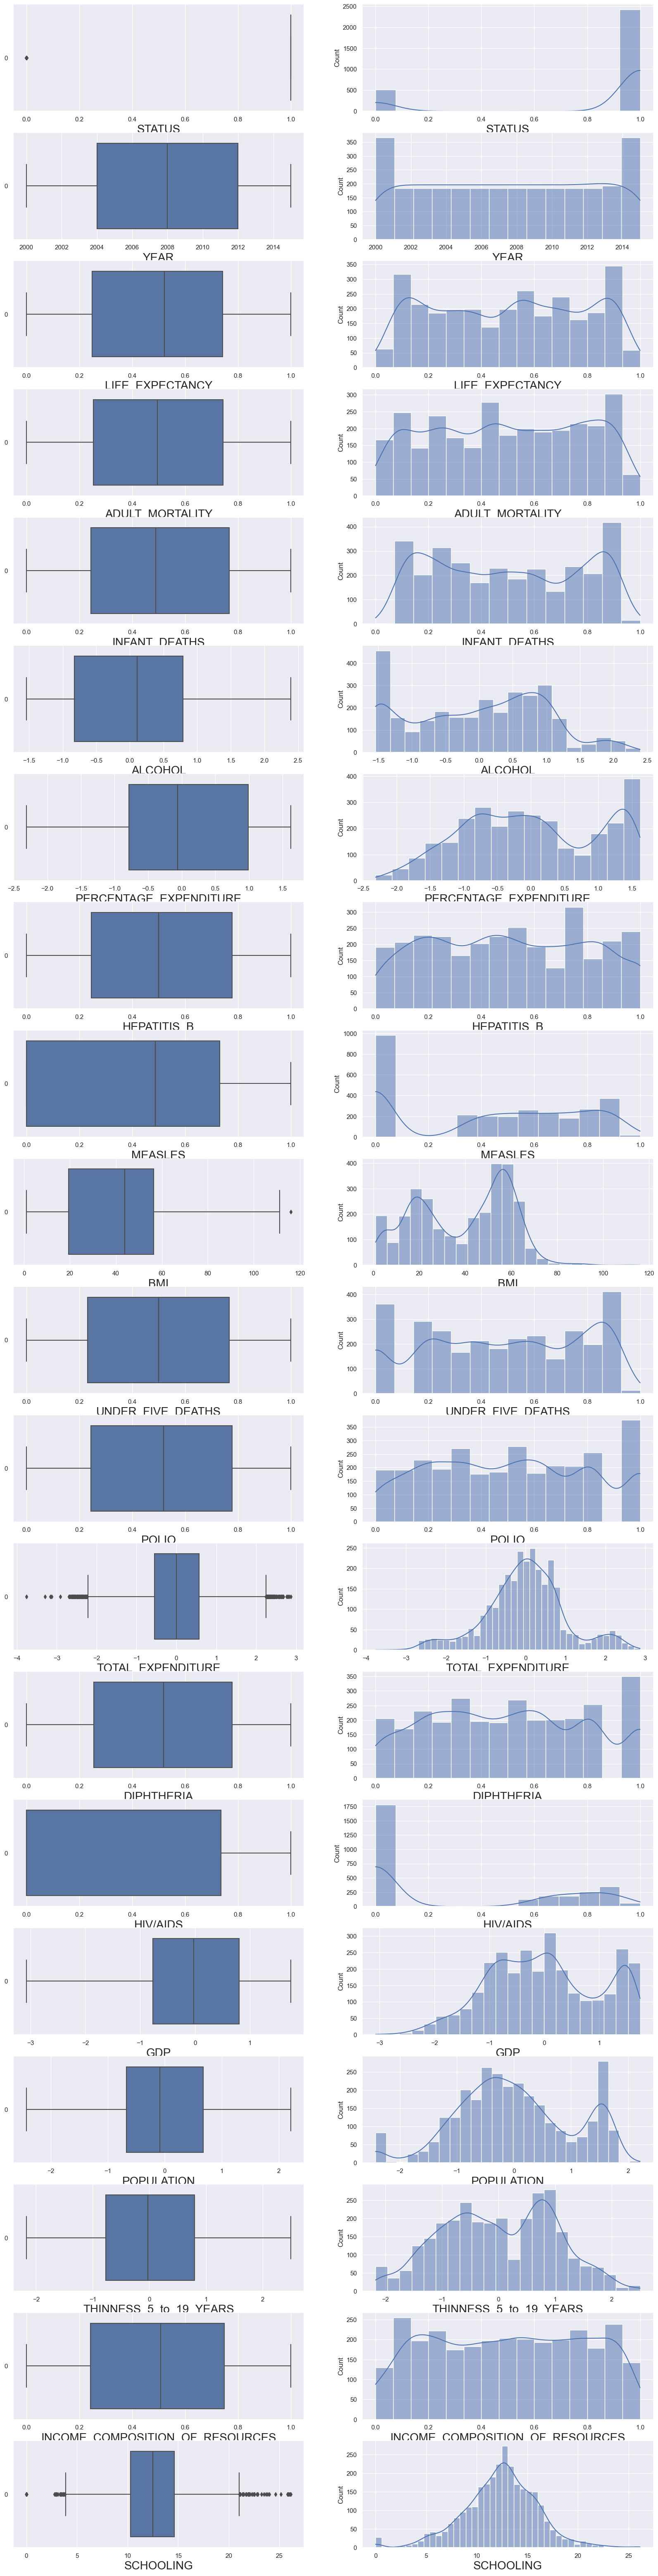

In [20]:
f, axes = plt.subplots(20, 2, figsize=(20, 80))
tmp=life_transform.select_dtypes(exclude='object')


count = 0
for var in tmp:
    sb.boxplot(data = life_transform[var], orient = "h", ax = axes[count,0])
    sb.histplot(data=life_transform[var], ax=axes[count,1],kde=True)
    ax1=axes[count,0]
    ax2=axes[count,1]
    ax1.set_xlabel(var,fontsize=20)
    ax2.set_xlabel(var,fontsize=20)
    count += 1
plt.show()

*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [3]:
life_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
scaler= StandardScaler()

In [9]:
life_transform[['LIFE_EXPECTANCY_T',
             'ADULT_MORTALITY_T',
             'INFANT_DEATHS_T',
             'ALCOHOL_T',
             'PERCENTAGE_EXPENDITURE_T',
             'HEPATITIS_B_T',
             'MEASLES_T',
             'BMI_T',
             'UNDER_FIVE_DEATHS_T',
             'POLIO_T',
             'TOTAL_EXPENDITURE_T',
             'DIPHTHERIA_T',
             'HIV/AIDS_T',
             'GDP_T',
             'POPULATION_T',
             'THINNESS_5_to_19_YEARS_T',
             'INCOME_COMPOSITION_OF_RESOURCES_T',
             'SCHOOLING_T']]=scaler.fit_transform(life_transform[['LIFE_EXPECTANCY',
                                                         'ADULT_MORTALITY',
                                                         'INFANT_DEATHS',
                                                         'ALCOHOL',
                                                         'PERCENTAGE_EXPENDITURE',
                                                         'HEPATITIS_B',
                                                         'MEASLES',
                                                         'BMI',
                                                         'UNDER_FIVE_DEATHS',
                                                         'POLIO',
                                                         'TOTAL_EXPENDITURE',
                                                         'DIPHTHERIA',
                                                         'HIV/AIDS',
                                                         'GDP',
                                                         'POPULATION',
                                                         'THINNESS_5_to_19_YEARS',
                                                         'INCOME_COMPOSITION_OF_RESOURCES',
                                                         'SCHOOLING']])

In [10]:
life_transform

COUNTRY  STATUS    YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0     Afghanistan       1  2015.0         0.294686         0.802268   
1     Afghanistan       1  2014.0         0.187396         0.813152   
2     Afghanistan       1  2013.0         0.187396         0.809070   
3     Afghanistan       1  2012.0         0.180763         0.814512   
4     Afghanistan       1  2011.0         0.175788         0.818594   
...           ...     ...     ...              ...              ...   
2933     Zimbabwe       1  2004.0         0.046784         1.000000   
2934     Zimbabwe       1  2003.0         0.047953         0.997757   
2935     Zimbabwe       1  2002.0         0.049708         0.248889   
2936     Zimbabwe       1  2001.0         0.052632         0.989627   
2937     Zimbabwe       1  2000.0         0.056725         0.983740   

      INFANT_DEATHS   ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B   MEASLES  \
0          0.606280 -1.540089               -0.653537     0.317298  0.806913   
1          0.611111 -1.540089               -0.641558     0.293245  0.766886   
2          0.615942 -1.540089               -0.643161     0.309280  0.749863   
3          0.623188 -1.540089               -0.617785     0.333333  0.883365   
4          0.628019 -1.540089               -1.506529     0.340278  0.888946   
...             ...       ...                     ...          ...       ...   
2933       0.484848  0.149101                1.081648     0.340278  0.547009   
2934       0.479798  0.088457                1.061102     0.018072  0.799610   
2935       0.474747  0.162786               -2.312958     0.375000  0.715266   
2936       0.474747 -0.554276               -2.312958     0.395833  0.777046   
2937       0.469697 -0.569376                0.536294     0.416667  0.822316   

      ...  UNDER_FIVE_DEATHS_T   POLIO_T  TOTAL_EXPENDITURE_T  DIPHTHERIA_T  \
0     ...             0.444814 -1.661691             0.562634     -1.118386   
1     ...             0.461894 -1.261026             0.567017     -1.169130   
2     ...             0.478974 -1.187665             0.556038     -1.135300   
3     ...             0.501747 -1.095963             0.639925     -1.084556   
4     ...             0.524521 -1.077623             0.497836     -1.067641   
...   ...                  ...       ...                  ...           ...   
2933  ...             0.167594 -1.095963             0.321024     -1.118386   
2934  ...             0.153142 -1.654637             0.161034     -1.067641   
2935  ...             0.138689 -0.985921             0.163773     -1.016897   
2936  ...             0.124237 -0.912560             0.059581     -0.949238   
2937  ...             0.124237 -0.839199             0.313477     -0.837601   

      HIV/AIDS_T     GDP_T  POPULATION_T  THINNESS_5_to_19_YEARS_T  \
0      -0.794234 -0.765913      0.695802                  1.863475   
1      -0.794234 -0.745047     -0.642920                  1.881842   
2      -0.794234 -0.731598      0.674292                  1.896363   
3      -0.794234 -0.705787     -0.011252                  1.914304   
4      -0.794234 -1.725140     -0.073218                  1.932018   
...          ...       ...           ...                       ...   
2933    1.672388 -0.876123      0.368261                  1.109933   
2934    1.691347 -0.877103      0.364611                  1.166410   
2935    1.710307 -1.768514     -0.857872                 -0.981848   
2936    1.724374 -0.793556      0.357704                 -0.744249   
2937    1.732937 -0.794540      0.353934                  1.311940   

      INCOME_COMPOSITION_OF_RESOURCES_T  SCHOOLING_T  
0                             -0.994979    -0.614119  
1                             -1.009602    -0.641527  
2                             -1.038850    -0.668935  
3                             -1.072971    -0.696343  
4                             -1.116842    -0.778567  
...                                 ...          ...  
2933                 

In [11]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [12]:
life_transform_num=life_transform.drop(['COUNTRY','STATUS'],axis=1)
life_transform_num

YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  INFANT_DEATHS   ALCOHOL  \
0     2015.0         0.294686         0.802268       0.606280 -1.540089   
1     2014.0         0.187396         0.813152       0.611111 -1.540089   
2     2013.0         0.187396         0.809070       0.615942 -1.540089   
3     2012.0         0.180763         0.814512       0.623188 -1.540089   
4     2011.0         0.175788         0.818594       0.628019 -1.540089   
...      ...              ...              ...            ...       ...   
2933  2004.0         0.046784         1.000000       0.484848  0.149101   
2934  2003.0         0.047953         0.997757       0.479798  0.088457   
2935  2002.0         0.049708         0.248889       0.474747  0.162786   
2936  2001.0         0.052632         0.989627       0.474747 -0.554276   
2937  2000.0         0.056725         0.983740       0.469697 -0.569376   

      PERCENTAGE_EXPENDITURE  HEPATITIS_B   MEASLES   BMI  UNDER_FIVE_DEATHS  \
0                  -0.653537     0.317298  0.806913  19.1           0.616162   
1                  -0.641558     0.293245  0.766886  18.6           0.621212   
2                  -0.643161     0.309280  0.749863  18.1           0.626263   
3                  -0.617785     0.333333  0.883365  17.6           0.632997   
4                  -1.506529     0.340278  0.888946  17.2           0.639731   
...                      ...          ...       ...   ...                ...   
2933                1.081648     0.340278  0.547009  27.1           0.534188   
2934                1.061102     0.018072  0.799610  26.7           0.529915   
2935               -2.312958     0.375000  0.715266  26.3           0.525641   
2936               -2.312958     0.395833  0.777046  25.9           0.521368   
2937                0.536294     0.416667  0.822316  25.5           0.521368   

      ...  UNDER_FIVE_DEATHS_T   POLIO_T  TOTAL_EXPENDITURE_T  DIPHTHERIA_T  \
0     ...             0.444814 -1.661691             0.562634     -1.118386   
1     ...             0.461894 -1.261026             0.567017     -1.169130   
2     ...             0.478974 -1.187665             0.556038     -1.135300   
3     ...             0.501747 -1.095963             0.639925     -1.084556   
4     ...             0.524521 -1.077623             0.497836     -1.067641   
...   ...                  ...       ...                  ...           ...   
2933  ...             0.167594 -1.095963             0.321024     -1.118386   
2934  ...             0.153142 -1.654637             0.161034     -1.067641   
2935  ...             0.138689 -0.985921             0.163773     -1.016897   
2936  ...             0.124237 -0.912560             0.059581     -0.949238   
2937  ...             0.124237 -0.839199             0.313477     -0.837601   

      HIV/AIDS_T     GDP_T  POPULATION_T  THINNESS_5_to_19_YEARS_T  \
0      -0.794234 -0.765913      0.695802                  1.863475   
1      -0.794234 -0.745047     -0.642920                  1.881842   
2      -0.794234 -0.731598      0.674292                  1.896363   
3      -0.794234 -0.705787     -0.011252                  1.914304   
4      -0.794234 -1.725140     -0.073218                  1.932018   
...          ...       ...           ...                       ...   
2933    1.672388 -0.876123      0.368261                  1.109933   
2934    1.691347 -0.877103      0.364611                  1.166410   
2935    1.710307 -1.768514     -0.857872                 -0.981848   
2936    1.724374 -0.793556      0.357704                 -0.744249   
2937    1.732937 -0.794540      0.353934                  1.311940   

      INCOME_COMPOSITION_OF_RESOURCES_T  SCHOOLING_T  
0                             -0.994979    -0.614119  
1                             -1.009602    -0.641527  
2                             -1.038850    -0.668935  
3                             -1.072971    -0.696343  
4                             -1.116842    -0.778567  
...                       

C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


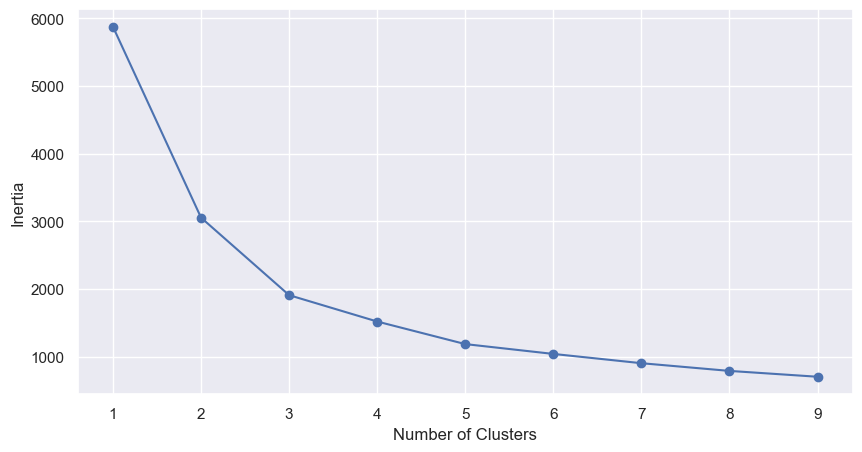

In [25]:
optimise_k_means(life_filled_num[['BMI_T','ADULT_MORTALITY_T']],10)

In [26]:
kmeans=KMeans(n_clusters=3)

In [28]:
kmeans.fit(life_filled_num[['BMI_T','ADULT_MORTALITY_T']])

KMeans(n_clusters=3)

In [29]:
life_filled_num['kmeans_3']=kmeans.labels_

In [31]:
life_filled_num

YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  INFANT_DEATHS  ALCOHOL  \
0     2015.0             65.0            263.0           62.0     0.01   
1     2014.0             59.9            271.0           64.0     0.01   
2     2013.0             59.9            268.0           66.0     0.01   
3     2012.0             59.5            272.0           69.0     0.01   
4     2011.0             59.2            275.0           71.0     0.01   
...      ...              ...              ...            ...      ...   
2933  2004.0             44.3            723.0           27.0     4.36   
2934  2003.0             44.5            715.0           26.0     4.06   
2935  2002.0             44.8             73.0           25.0     4.43   
2936  2001.0             45.3            686.0           25.0     1.72   
2937  2000.0             46.0            665.0           24.0     1.68   

      PERCENTAGE_EXPENDITURE  HEPATITIS_B  MEASLES   BMI  UNDER_FIVE_DEATHS  \
0                  71.279624         65.0   1154.0  19.1               83.0   
1                  73.523582         62.0    492.0  18.6               86.0   
2                  73.219243         64.0    430.0  18.1               89.0   
3                  78.184215         67.0   2787.0  17.6               93.0   
4                   7.097109         68.0   3013.0  17.2               97.0   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0     31.0  27.1               42.0   
2934                0.000000          7.0    998.0  26.7               41.0   
2935                0.000000         73.0    304.0  26.3               40.0   
2936                0.000000         76.0    529.0  25.9               39.0   
2937                0.000000         79.0   1483.0  25.5               39.0   

      ...   POLIO_T  TOTAL_EXPENDITURE_T  DIPHTHERIA_T  HIV/AIDS_T     GDP_T  \
0     ... -3.091774             0.255313     -0.703828   -0.323445 -0.616446   
1     ... -1.007902             0.259609     -0.820601   -0.323445 -0.615297   
2     ... -0.847604             0.248869     -0.742752   -0.323445 -0.614527   
3     ... -0.647232             0.332643     -0.625979   -0.323445 -0.612983   
4     ... -0.607158             0.193019     -0.587055   -0.323445 -0.637489   
...   ...       ...                  ...           ...         ...       ...   
2933  ... -0.647232             0.034063     -0.703828    6.275044 -0.621695   
2934  ... -3.051699            -0.096969     -0.587055    6.885650 -0.621736   
2935  ... -0.406786            -0.094821     -0.470282    7.496256 -0.637739   
2936  ... -0.286562            -0.174299     -0.314585    7.949287 -0.617888   
2937  ... -0.206413             0.027618     -0.197813    8.225045 -0.617937   

      POPULATION_T  THINNESS_5_to_19_YEARS_T  \
0        -0.283994                  2.634083   
1        -0.542461                  2.687818   
2        -0.299504                  2.730806   
3        -0.516394                  2.784541   
4        -0.521951                  2.838277   
...            ...                       ...   
2933     -0.446142                  0.946800   
2934     -0.447253                  1.043523   
2935     -0.544024                 -0.804966   
2936     -0.449325                 -0.718990   
2937     -0.450438                  1.312199   

      INCOME_COMPOSITION_OF_RESOURCES_T  SCHOOLING_T  kmeans_3  
0                             -0.685459    -0.583097         2  
1                             -0.696497    -0.607519         2  
2                             -0.718574    -0.631942         2  
3                             -0.744330    -0.656365         2  
4                             -0.777446    -0.729632         2  
...                                 ...          ...       ...  
2933                          -0.950381    -0.802900         2  
2934                          -0.909907    -0.729632         2  
2935                          -0.876792    -0.6

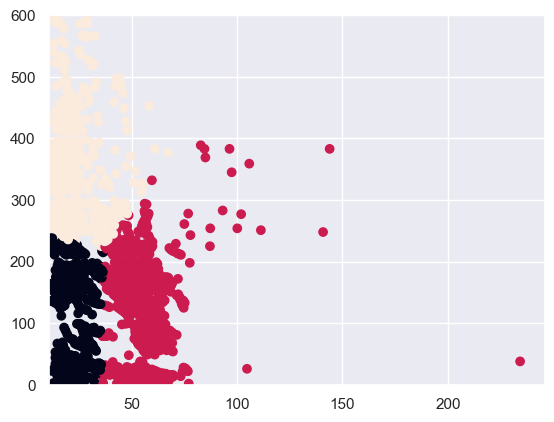

In [30]:
plt.scatter(x=life_filled_num['BMI'],y=life_filled_num['ADULT_MORTALITY'],c=life_filled_num['kmeans_3'])
plt.xlim(10.70)
plt.ylim(0,600)
plt.show()

## Create Multiple Clusters

In [33]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(life_filled_num[['BMI_T','ADULT_MORTALITY_T']])
    life_filled_num[f'KMeans_{k}']=kmeans.labels_

C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


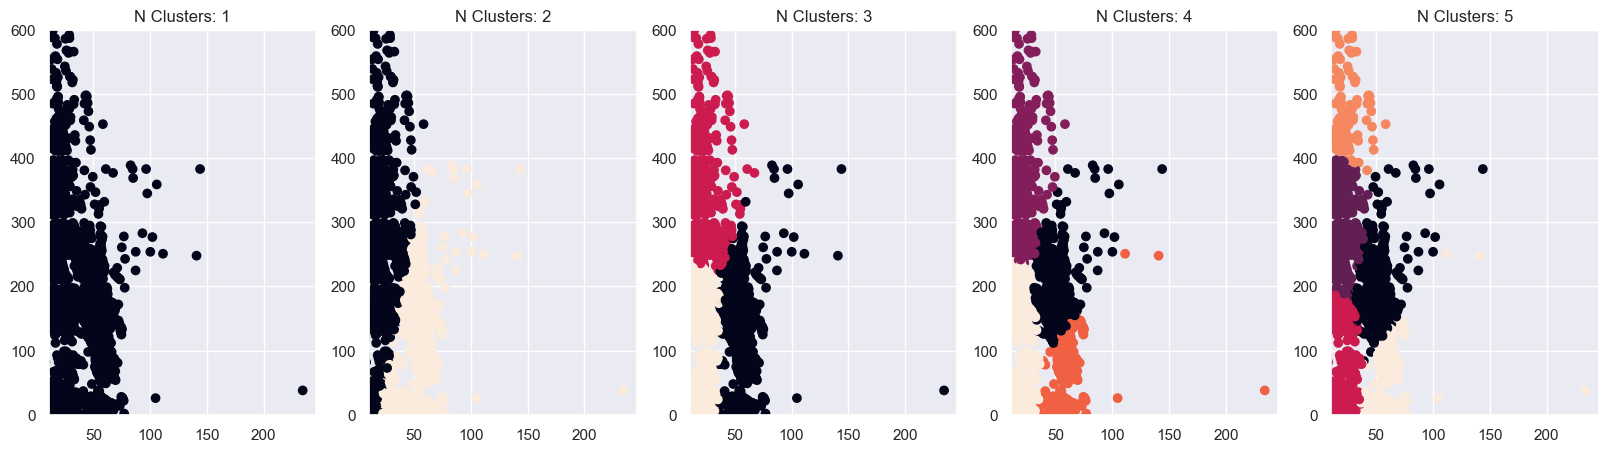

In [34]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
    ax.scatter(x=life_filled_num['BMI'],y=life_filled_num['ADULT_MORTALITY'],c=life_filled_num[f'KMeans_{i}'])
    ax.set_xlim(10.70)
    ax.set_ylim(0,600)
    ax.set_title(f'N Clusters: {i}')